In [16]:
import os
import json

import pandas as pd
import numpy as np

In [2]:
ini_work_dir = os.getcwd()
os.chdir('..')

In [3]:
with open('config.json') as file:
    config = json.load(file)

In [4]:
files_folder = config['files_folders']['processed']
research_results_folder = config['files_folders']['research_results']
antecedent_params_folder = config['files_folders']['antecedent_params_sets']
metadata_file_name = 'current_antecedent_fitting_metadata_seasonal.pkl'
logs_folder = config['files_folders']['logs']
summary_table_name = 'summary_table_seas'

In [91]:
pd.options.display.max_colwidth = 300
pd.options.display.precision = 15

# Reading results files

## Seasonal

In [ ]:
_files = ['fitting_consequent_params_seasonal_raw_result_nb_0_2022-09-25 00-10-02.655534.pkl']
_res = [pd.read_pickle(f'{research_results_folder}/{_file}') for _file in _files]
_res = [_elem for arr in _res for _elem in arr].copy()

res = pd.DataFrame.from_records(_res).copy()

In [ ]:
if (res['status'] != 0).any():
    raise Error('Not all models were fitted')

In [ ]:
res.sort_values('rmse')

In [84]:
_.iloc[0]['rmse']

0.001660824599800267377

In [93]:
res['rmse'].value_counts()

0.001660824599800    17
0.001660824599800    12
0.001660824599800     7
0.001660824599800     6
0.001660824599800     6
                     ..
0.001660832600220     1
0.001660827520141     1
0.001660824599803     1
0.001660824599801     1
0.001660824600407     1
Name: rmse, Length: 1632, dtype: int64

In [82]:
eps = 1e-5
res[(res['rmse'] - 0.001720).abs() < eps]

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback
531,"[{'a': [2.8660254037844384, 1.0], 'b': [3.133974596215561, 1.0], 'c': [5.0, 2.8660254037844384], 'd': [5.0, 3.133974596215561], 'n_clusters': 2}, {'centers': (-5.5, -1.5, -0.5, 4.0), 'variances': (4, 4, 6, 6), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x7fefb67ec760>,0.000003,0.001720,1.207340,None,None
706,"[{'a': [2.8660254037844384, 1.0], 'b': [3.133974596215561, 1.0], 'c': [5.0, 2.8660254037844384], 'd': [5.0, 3.133974596215561], 'n_clusters': 2}, {'centers': (-5.5, 0.5, -0.5, 2.0), 'variances': (4, 4, 6, 4), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x7fef9ac284f0>,0.000003,0.001720,1.207743,None,None
2038,"[{'a': [1.1339745962155612, 1.0], 'b': [4.866025403784438, 1.0], 'c': [5.0, 1.1339745962155612], 'd': [5.0, 4.866025403784438], 'n_clusters': 2}, {'centers': (-5.5, -3.5, 1.5, 6.0), 'variances': (4, 6, 6, 4), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x7fef8e2324c0>,0.000003,0.001720,1.209028,None,None
2097,"[{'a': [1.1339745962155612, 1.0], 'b': [4.866025403784438, 1.0], 'c': [5.0, 1.1339745962155612], 'd': [5.0, 4.866025403784438], 'n_clusters': 2}, {'centers': (-5.5, -3.5, 3.5, 2.0), 'variances': (4, 4, 4, 6), 'n_clusters': 4}]",0,<model.FuzzyVolatilityModel object at 0x7fef8e6028e0>,0.000003,0.001719,1.209963,None,None


<AxesSubplot:>

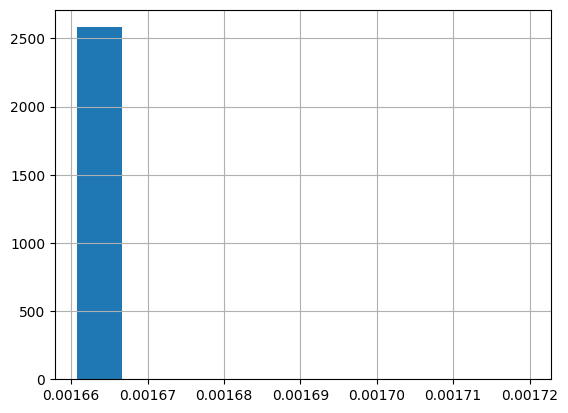

In [63]:
res['rmse'].hist(grid=True)

## W/o seasonality

In [72]:
_files = ['fitting_consequent_params_wo_seas_raw_result_nb_0_2022-09-25 00-09-43.615320.pkl']
_res = [pd.read_pickle(f'{research_results_folder}/{_file}') for _file in _files]
_res = [_elem for arr in _res for _elem in arr].copy()

res_wos = pd.DataFrame.from_records(_res).copy()

In [73]:
res_wos.sort_values('rmse')

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback
830,"[{'centers': (-5.5, -3.5, -0.5, 4.0), 'varianc...",0,<model.FuzzyVolatilityModel object at 0x7fefa7...,0.000003,0.001661,1.234396,None,None
1292,"[{'centers': (-9.5, -3.5, -0.5, 2.0), 'varianc...",0,<model.FuzzyVolatilityModel object at 0x7fef8f...,0.000003,0.001661,1.234396,None,None
765,"[{'centers': (-5.5, -3.5, 1.5, 2.0), 'variance...",0,<model.FuzzyVolatilityModel object at 0x7fefa7...,0.000003,0.001661,1.234396,None,None
685,"[{'centers': (-5.5, 0.5, -0.5, 4.0), 'variance...",0,<model.FuzzyVolatilityModel object at 0x7fefa6...,0.000003,0.001661,1.234396,None,None
844,"[{'centers': (-5.5, -3.5, -0.5, 6.0), 'varianc...",0,<model.FuzzyVolatilityModel object at 0x7fefa8...,0.000003,0.001661,1.234396,None,None
...,...,...,...,...,...,...,...,...
563,"[{'centers': (-5.5, -1.5, -0.5, 2.0), 'varianc...",0,<model.FuzzyVolatilityModel object at 0x7fefa4...,0.000003,0.001661,1.234419,None,None
273,"[{'centers': (-7.5, 0.5, -0.5, 2.0), 'variance...",0,<model.FuzzyVolatilityModel object at 0x7fefba...,0.000003,0.001720,1.206314,None,None
1137,"[{'centers': (-9.5, 0.5, -0.5, 2.0), 'variance...",0,<model.FuzzyVolatilityModel object at 0x7fef8e...,0.000003,0.001720,1.206314,None,None
281,"[{'centers': (-7.5, 0.5, -0.5, 2.0), 'variance...",0,<model.FuzzyVolatilityModel object at 0x7fefc8...,0.000003,0.001720,1.206314,None,None


In [75]:
eps = 1e-5
res_wos[(res_wos['rmse'] - 0.001720).abs() < eps]

,antecedent_params,status,fvm,mse,rmse,mape,exception,traceback
273,"[{'centers': (-7.5, 0.5, -0.5, 2.0), 'variance...",0,<model.FuzzyVolatilityModel object at 0x7fefba...,0.000003,0.00172,1.206314,None,None
281,"[{'centers': (-7.5, 0.5, -0.5, 2.0), 'variance...",0,<model.FuzzyVolatilityModel object at 0x7fefc8...,0.000003,0.00172,1.206314,None,None
1137,"[{'centers': (-9.5, 0.5, -0.5, 2.0), 'variance...",0,<model.FuzzyVolatilityModel object at 0x7fef8e...,0.000003,0.00172,1.206314,None,None
1145,"[{'centers': (-9.5, 0.5, -0.5, 2.0), 'variance...",0,<model.FuzzyVolatilityModel object at 0x7fef8e...,0.000003,0.00172,1.206314,None,None


<AxesSubplot:>

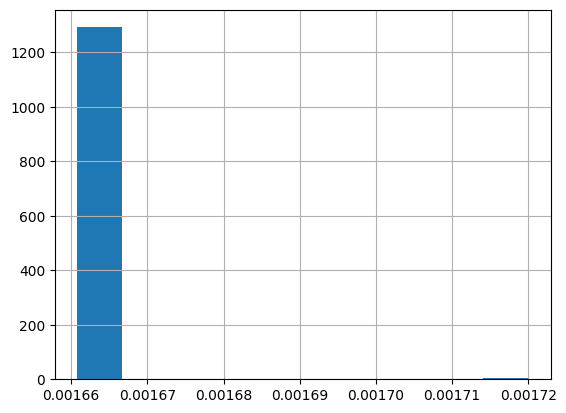

In [74]:
res_wos['rmse'].hist(grid=True)